<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
iris = load_iris()
x = iris.data
y = iris.target

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring = 'accuracy')
print (scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [28]:
print (scores.mean())

0.9666666666666668


In [30]:
 k_range = range(1,31)
 k_scores = []
 for k in k_range:  
    knn = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated accuracy')

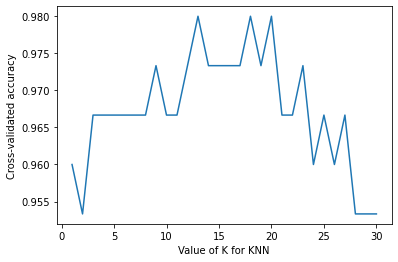

In [31]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [35]:
from sklearn.model_selection import GridSearchCV

In [40]:
k_range = range(1, 31)

In [41]:
param_grid = dict(n_neighbors = k_range)


In [42]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [43]:
grid.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [45]:
grid.cv_results_

{'mean_fit_time': array([0.00064609, 0.00056238, 0.00047452, 0.00047889, 0.00047808,
        0.00047526, 0.00053797, 0.00052059, 0.00048764, 0.00052967,
        0.00052683, 0.00047808, 0.0005825 , 0.00053191, 0.00052557,
        0.00062354, 0.00058739, 0.00054078, 0.00069456, 0.00046623,
        0.00047498, 0.00051982, 0.00047615, 0.00048573, 0.00068011,
        0.00062287, 0.0006319 , 0.00064576, 0.00059664, 0.00059369]),
 'mean_score_time': array([0.00187824, 0.0016959 , 0.0013761 , 0.00134833, 0.00137744,
        0.0014148 , 0.00156982, 0.00149944, 0.00141711, 0.00148923,
        0.00147946, 0.0014684 , 0.0016566 , 0.00154438, 0.00161645,
        0.00192022, 0.00169473, 0.00158808, 0.0018666 , 0.00139303,
        0.00144217, 0.00150816, 0.00139413, 0.00145066, 0.00219893,
        0.00185187, 0.00184085, 0.0019031 , 0.00179317, 0.00169818]),
 'mean_test_score': array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.97333333, 0

In [48]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [54]:
grid_mean_scores = []
for i in ['mean_test_score']:
  print(i, ":", grid.cv_results_[i])
  grid_mean_scores.append(grid.cv_results_[i])

mean_test_score : [0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


In [55]:
print(grid_mean_scores)

[array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])]


In [58]:
print(grid.best_score_)
print(grid.best_params_)


0.9800000000000001
{'n_neighbors': 13}
